In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz
from graphviz import Source
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix

import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

In [2]:
crashes=pd.read_csv('NYPD_Motor_Vehicle_Collisions_-_Crashes_in_2018.csv')

In [3]:
crashes['VEHICLE TYPE CODE 1']=crashes['VEHICLE TYPE CODE 1'].str.lower()

In [4]:
pd.set_option('display.max_columns', None)


In [5]:
key_values=crashes['VEHICLE TYPE CODE 1'].value_counts().head(20)

In [6]:
list (key_values.keys())

['sedan',
 'station wagon/sport utility vehicle',
 'passenger vehicle',
 'sport utility / station wagon',
 'taxi',
 'pick-up truck',
 'box truck',
 'bus',
 'bike',
 'tk',
 'tractor truck diesel',
 'bu',
 'van',
 'motorcycle',
 'ds',
 'convertible',
 'dump',
 'vn',
 'pk',
 'ambulance']

In [7]:
value_to_fil=['sedan',
 'station wagon/sport utility vehicle',
 'passenger vehicle',
 'sport utility / station wagon',
 'taxi',
 'pick-up truck',
 'box truck',
 'bus',
 'bike',
 'tractor truck diesel',
 'van',
 'motorcycle',
 'convertible',
 'ambulance']


In [8]:
len(value_to_fil)

14

In [9]:
filtered_df=crashes[ 
(crashes['VEHICLE TYPE CODE 1']==value_to_fil[0])|\
(crashes['VEHICLE TYPE CODE 1']==value_to_fil[1])|\
(crashes['VEHICLE TYPE CODE 1']==value_to_fil[2])|\
(crashes['VEHICLE TYPE CODE 1']==value_to_fil[3])|\
(crashes['VEHICLE TYPE CODE 1']==value_to_fil[4])|\
(crashes['VEHICLE TYPE CODE 1']==value_to_fil[5])|\
(crashes['VEHICLE TYPE CODE 1']==value_to_fil[6])|\
(crashes['VEHICLE TYPE CODE 1']==value_to_fil[7])|\
(crashes['VEHICLE TYPE CODE 1']==value_to_fil[8])|\
(crashes['VEHICLE TYPE CODE 1']==value_to_fil[9])|\
(crashes['VEHICLE TYPE CODE 1']==value_to_fil[10])\
]



















In [10]:
values2=filtered_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10).keys()

In [11]:
 value_factors=list(values2)

In [12]:
value_factors

['Driver Inattention/Distraction',
 'Unspecified',
 'Following Too Closely',
 'Failure to Yield Right-of-Way',
 'Backing Unsafely',
 'Passing or Lane Usage Improper',
 'Passing Too Closely',
 'Unsafe Lane Changing',
 'Other Vehicular',
 'Turning Improperly']

In [13]:
accident_caused_fil=filtered_df[
(filtered_df['CONTRIBUTING FACTOR VEHICLE 1']!=value_factors[0])|\
(filtered_df['CONTRIBUTING FACTOR VEHICLE 1']==value_factors[2])|\
(filtered_df['CONTRIBUTING FACTOR VEHICLE 1']==value_factors[3])|\
(filtered_df['CONTRIBUTING FACTOR VEHICLE 1']==value_factors[4])|\
(filtered_df['CONTRIBUTING FACTOR VEHICLE 1']==value_factors[5])\

]

In [14]:
new_df_dumm=pd.get_dummies(accident_caused_fil,columns=['CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1']) 

In [15]:
 colums_values=list(new_df_dumm.columns)

In [16]:
group_by_zip=new_df_dumm.groupby('ZIP CODE')

In [17]:
colums_values

['DATE',
 'TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'ON STREET NAME',
 'CROSS STREET NAME',
 'OFF STREET NAME',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'COLLISION_ID',
 'VEHICLE TYPE CODE 2',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5',
 'CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective',
 'CONTRIBUTING FACTOR VEHICLE 1_Aggressive Driving/Road Rage',
 'CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement',
 'CONTRIBUTING FACTOR VEHICLE 1_Animals Action',
 'CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely',
 'CONTRIBUTING FACTOR VEHICLE 1_Brakes Defective',
 'CONTRIBUTING FACTOR VEHICLE 1_Cell 

In [18]:
group_by_zip['NUMBER OF PERSONS KILLED'].sum()

ZIP CODE
10000.0    0.0
10001.0    0.0
10002.0    2.0
10003.0    1.0
10004.0    0.0
10005.0    0.0
10006.0    0.0
10007.0    0.0
10009.0    0.0
10010.0    0.0
10011.0    1.0
10012.0    0.0
10013.0    2.0
10014.0    0.0
10016.0    1.0
10017.0    0.0
10018.0    0.0
10019.0    0.0
10020.0    0.0
10021.0    1.0
10022.0    0.0
10023.0    0.0
10024.0    0.0
10025.0    0.0
10026.0    0.0
10027.0    3.0
10028.0    1.0
10029.0    0.0
10030.0    0.0
10031.0    0.0
          ... 
11379.0    0.0
11385.0    2.0
11411.0    0.0
11412.0    1.0
11413.0    1.0
11414.0    3.0
11415.0    0.0
11416.0    0.0
11417.0    0.0
11418.0    2.0
11419.0    1.0
11420.0    1.0
11421.0    2.0
11422.0    0.0
11423.0    0.0
11426.0    1.0
11427.0    0.0
11428.0    0.0
11429.0    1.0
11430.0    0.0
11432.0    1.0
11433.0    1.0
11434.0    1.0
11435.0    1.0
11436.0    0.0
11691.0    0.0
11692.0    1.0
11693.0    0.0
11694.0    0.0
11697.0    0.0
Name: NUMBER OF PERSONS KILLED, Length: 209, dtype: float64

In [19]:
colums_values.index('CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective')

27

In [20]:
 col=colums_values[27:]

In [21]:
set_of_values=group_by_zip[col].sum()
injuries=group_by_zip['NUMBER OF PERSONS INJURED'].sum()


In [22]:
accidents=group_by_zip['ZIP CODE'].size()
accidents


ZIP CODE
10000.0      43
10001.0    1189
10002.0     982
10003.0     611
10004.0     189
10005.0      87
10006.0      98
10007.0     330
10009.0     337
10010.0     501
10011.0     894
10012.0     470
10013.0     986
10014.0     295
10016.0     806
10017.0     458
10018.0     906
10019.0    1179
10020.0      40
10021.0     351
10022.0     771
10023.0     513
10024.0     424
10025.0     397
10026.0     184
10027.0     539
10028.0     256
10029.0     553
10030.0     222
10031.0     291
           ... 
11379.0     447
11385.0    1491
11411.0     399
11412.0     480
11413.0     893
11414.0     337
11415.0     130
11416.0     180
11417.0     522
11418.0     318
11419.0     470
11420.0     855
11421.0     198
11422.0     809
11423.0     408
11426.0     270
11427.0     350
11428.0     274
11429.0     469
11430.0      20
11432.0     905
11433.0     594
11434.0    1235
11435.0     750
11436.0     225
11691.0     487
11692.0     130
11693.0     107
11694.0     120
11697.0      13
Name: ZIP CODE,

In [23]:
injuries=group_by_zip['NUMBER OF PERSONS INJURED'].sum()
injuries

ZIP CODE
10000.0      5.0
10001.0    152.0
10002.0    211.0
10003.0    138.0
10004.0     26.0
10005.0     16.0
10006.0     15.0
10007.0     62.0
10009.0     82.0
10010.0    114.0
10011.0    114.0
10012.0     71.0
10013.0    129.0
10014.0     44.0
10016.0    167.0
10017.0     81.0
10018.0     96.0
10019.0    143.0
10020.0      7.0
10021.0     53.0
10022.0    112.0
10023.0     62.0
10024.0     60.0
10025.0     74.0
10026.0     50.0
10027.0    132.0
10028.0     43.0
10029.0    101.0
10030.0     58.0
10031.0     67.0
           ...  
11379.0    105.0
11385.0    363.0
11411.0    166.0
11412.0    159.0
11413.0    306.0
11414.0     88.0
11415.0     24.0
11416.0     50.0
11417.0    165.0
11418.0     57.0
11419.0    121.0
11420.0    267.0
11421.0     52.0
11422.0    293.0
11423.0    133.0
11426.0     68.0
11427.0    110.0
11428.0     65.0
11429.0    149.0
11430.0      4.0
11432.0    226.0
11433.0    187.0
11434.0    376.0
11435.0    274.0
11436.0     82.0
11691.0    138.0
11692.0     49.0
11693

In [24]:
len(injuries[injuries>0])

194

In [25]:
injuries.keys()

Float64Index([10000.0, 10001.0, 10002.0, 10003.0, 10004.0, 10005.0, 10006.0,
              10007.0, 10009.0, 10010.0,
              ...
              11432.0, 11433.0, 11434.0, 11435.0, 11436.0, 11691.0, 11692.0,
              11693.0, 11694.0, 11697.0],
             dtype='float64', name='ZIP CODE', length=209)

In [26]:
set_of_values['accidents']=accidents

In [27]:
 set_of_values['injuries']=injuries

In [28]:
set_of_values.columns

Index(['CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective',
       'CONTRIBUTING FACTOR VEHICLE 1_Aggressive Driving/Road Rage',
       'CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement',
       'CONTRIBUTING FACTOR VEHICLE 1_Animals Action',
       'CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely',
       'CONTRIBUTING FACTOR VEHICLE 1_Brakes Defective',
       'CONTRIBUTING FACTOR VEHICLE 1_Cell Phone (hand-Held)',
       'CONTRIBUTING FACTOR VEHICLE 1_Cell Phone (hands-free)',
       'CONTRIBUTING FACTOR VEHICLE 1_Driver Inexperience',
       'CONTRIBUTING FACTOR VEHICLE 1_Driverless/Runaway Vehicle',
       'CONTRIBUTING FACTOR VEHICLE 1_Drugs (illegal)',
       'CONTRIBUTING FACTOR VEHICLE 1_Eating or Drinking',
       'CONTRIBUTING FACTOR VEHICLE 1_Failure to Keep Right',
       'CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield Right-of-Way',
       'CONTRIBUTING FACTOR VEHICLE 1_Fatigued/Drowsy',
       'CONTRIBUTING FACTOR VEHICLE 1_Fell Asleep',
       'CONTRIBUTING FACTOR VEH

In [29]:
new_df=set_of_values

# mille stone begin here

In [30]:
 new_df.loc

In [31]:
 lm = smf.ols("injuries ~ accidents+Q('VEHICLE TYPE CODE 1_sedan')+Q('VEHICLE TYPE CODE 1_box truck')+Q('CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed')",data =  new_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               injuries   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     627.8
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          2.07e-113
Time:                        23:49:43   Log-Likelihood:                -1020.3
No. Observations:                 209   AIC:                             2051.
Df Residuals:                     204   BIC:                             2067.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                         -10.1190      3.576     -2.830      0.005     -17.170      -3.068
accidents                                           0.1815      0.034      5.369      0.000       0.115       0.248
Q('VEHICLE TYPE CODE 1_sedan')                      0.2389      0.090      2.647      0.009       0.061       0.417
Q('VEHICLE TYPE CODE 1_box truck')                 -2.1321      0.308     -6.928      0.000      -2.739      -1.525
Q('CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed')     2.3865      0.499      4.780      0.000       1.402       3.371
==============================================================================
Omnibus:                       59.221   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              546.000
Skew:                           0.753   Prob(JB):                    2.74e-119
Kurtosis:                      10.774   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residual of the accidents and injuries')

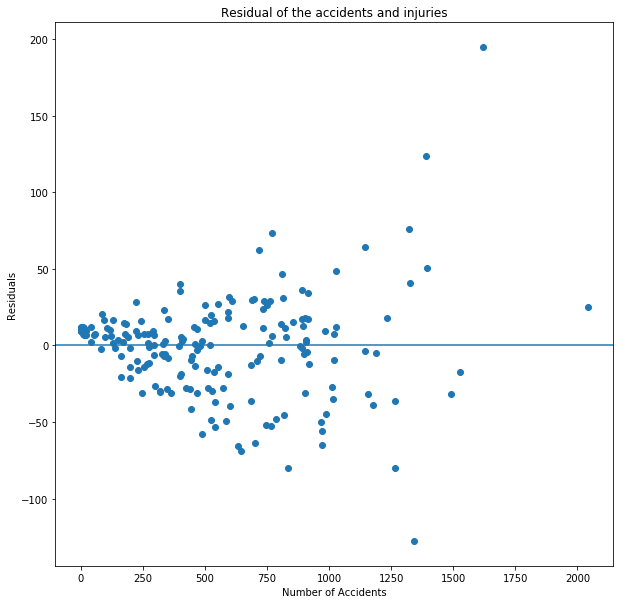

In [55]:
plt.scatter(x=new_df['accidents'],y=lm.resid)
plt.axhline(0)
plt.xlabel('Number of Accidents')
plt.ylabel('Residuals')
plt.title('Residual of the accidents and injuries')

In [33]:

# selecting the same fetures  as before
features=new_df[['accidents','VEHICLE TYPE CODE 1_sedan','VEHICLE TYPE CODE 1_box truck','CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed']]
features


,accidents,VEHICLE TYPE CODE 1_sedan,VEHICLE TYPE CODE 1_box truck,CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed
ZIP CODE,,,,
10000.0,43,10.0,0.0,1.0
10001.0,1189,296.0,66.0,9.0
10002.0,982,294.0,34.0,15.0
10003.0,611,182.0,21.0,4.0
10004.0,189,63.0,10.0,1.0
10005.0,87,19.0,7.0,0.0
10006.0,98,25.0,2.0,0.0
10007.0,330,99.0,8.0,2.0
10009.0,337,84.0,8.0,2.0


In [34]:
injuries=new_df.iloc[:,-1:]
injuries

,injuries
ZIP CODE,
10000.0,5.0
10001.0,152.0
10002.0,211.0
10003.0,138.0
10004.0,26.0
10005.0,16.0
10006.0,15.0
10007.0,62.0
10009.0,82.0


In [35]:
(lm.resid**2).mean()

1017.9937743442327

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features,injuries, test_size=0.2)




In [37]:
reg_train = tree.DecisionTreeRegressor(max_depth = 3)
reg_predict = reg_train.fit(X_train, y_train)

In [38]:
s=reg_predict.fit(X_test, y_test)
print(tree.export_graphviz(s))

digraph Tree {
node [shape=box] ;
0 [label="X[3] <= 17.0\nmse = 14251.658\nsamples = 42\nvalue = 123.762"] ;
1 [label="X[1] <= 128.5\nmse = 5014.961\nsamples = 37\nvalue = 89.892"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= 69.5\nmse = 683.922\nsamples = 19\nvalue = 29.158"] ;
1 -> 2 ;
3 [label="mse = 3.109\nsamples = 8\nvalue = 1.125"] ;
2 -> 3 ;
4 [label="mse = 191.884\nsamples = 11\nvalue = 49.545"] ;
2 -> 4 ;
5 [label="X[1] <= 200.5\nmse = 1583.222\nsamples = 18\nvalue = 154.0"] ;
1 -> 5 ;
6 [label="mse = 976.984\nsamples = 8\nvalue = 123.625"] ;
5 -> 6 ;
7 [label="mse = 739.61\nsamples = 10\nvalue = 178.3"] ;
5 -> 7 ;
8 [label="X[1] <= 429.5\nmse = 11294.64\nsamples = 5\nvalue = 374.4"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="X[0] <= 964.5\nmse = 278.222\nsamples = 3\nvalue = 288.667"] ;
8 -> 9 ;
10 [label="mse = 9.0\nsamples = 2\nvalue = 277.0"] ;
9 -> 10 ;
11 [label="mse = 0.0\nsamples = 1\nvalue = 312.0"

In [39]:
X_test

,accidents,VEHICLE TYPE CODE 1_sedan,VEHICLE TYPE CODE 1_box truck,CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed
ZIP CODE,,,,
11364.0,268,82.0,0.0,6.0
11221.0,759,266.0,14.0,15.0
11205.0,520,146.0,13.0,8.0
11210.0,913,355.0,3.0,21.0
11361.0,400,114.0,3.0,2.0
11231.0,490,199.0,9.0,5.0
10106.0,1,1.0,0.0,0.0
10462.0,786,293.0,5.0,13.0
11372.0,733,247.0,13.0,3.0


In [40]:
 predicted_values=reg_predict.predict(X_test)

In [41]:
 resid= (y_test['injuries']-predicted_values)**2

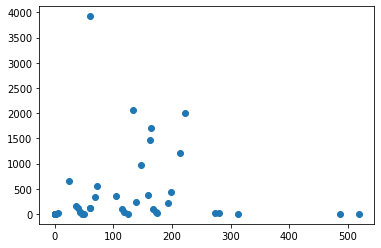

In [42]:
plt.scatter(y_test,resid)


Text(0.5, 0, 'actual values of injuries ')

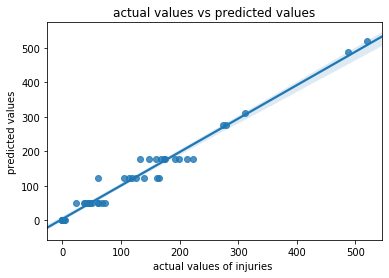

In [43]:
ax=sns.regplot(y_test,predicted_values)
ax.set_title('actual values vs predicted values')
ax.set_ylabel('predicted values')
ax.set_xlabel('actual values of injuries ')


In [44]:
 from sklearn.metrics import mean_squared_error

In [45]:
 mean_squared_error(y_test,predicted_values)

413.4661255411255

In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [47]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [48]:
k3nn = KNeighborsRegressor(n_neighbors =3)
k3nn.fit(X_train, y_train)
y_pred_k = k3nn.predict(X_test)
y_pred_k

 

array([[5.80000000e+01],
       [1.68333333e+02],
       [8.13333333e+01],
       [2.90333333e+02],
       [8.00000000e+01],
       [1.27666667e+02],
       [3.33333333e-01],
       [1.96000000e+02],
       [1.98333333e+02],
       [1.10000000e+02],
       [3.33333333e-01],
       [1.96666667e+01],
       [1.76333333e+02],
       [6.70000000e+01],
       [1.84666667e+02],
       [1.93333333e+02],
       [2.43000000e+02],
       [9.86666667e+01],
       [6.36666667e+01],
       [1.08000000e+02],
       [1.83000000e+02],
       [9.03333333e+01],
       [1.68333333e+02],
       [3.51666667e+02],
       [4.26666667e+01],
       [3.00000000e+00],
       [1.36000000e+02],
       [0.00000000e+00],
       [3.70000000e+01],
       [5.93333333e+01],
       [3.51666667e+02],
       [2.00000000e+00],
       [1.68000000e+02],
       [3.00000000e+00],
       [1.65666667e+02],
       [9.70000000e+01],
       [3.83333333e+01],
       [8.80000000e+01],
       [6.66666667e-01],
       [1.85666667e+02],


In [49]:
 
value_list=[]
for i in y_pred_k:
        value_list.append(i[0])

In [50]:
value_list_pred_k=pd.Series(value_list)

Text(0.5, 0, 'actual values of injuries ')

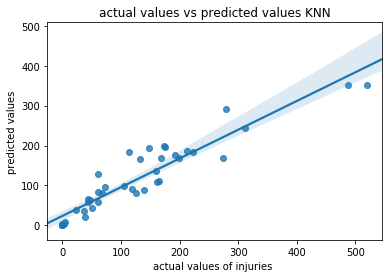

In [51]:
ax=sns.regplot(y_test,value_list_pred_k)
ax.set_title('actual values vs predicted values KNN')
ax.set_ylabel('predicted values')
ax.set_xlabel('actual values of injuries ')

In [52]:
k3nn.get_params

<bound method BaseEstimator.get_params of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')>

In [53]:
 mean_squared_error(y_test,value_list_pred_k)

2239.1137566137563